# Multiple plotting of modules parameters, acquired by the flash test technique, after different treatments

### Introduction
This programm plots the module parameters versus the irradiance for various module treatment. The parameters are acquired using the flash test method.
<br/>
The module parameters, as well as the I/V curves, are stored in .csv files which names obeys the following format:
- UUUdddd_ddddW_Td.csv with U=[A-Z,-,_] and d=[1-9]. We have:
  - UUUdddd_dddd is the module type the number of U is unlimited  and the  the number of digits d is limited to 50
  - ddddW is the irradiande in W/m^2. The number of digits d must be equal to 4.
  - Td is the treatment label. The numer of digit d is equal to 1.
These files are stored in the *data_folder* and all its sub folders
and can be parsed by the function *data_parsing(filepath, parse_all=True)*

### Description
</br></br>
The program:
1. Interactevelly defines the *data_folder* where *data_folder* must be locate is the users home directory.
2. Recursivelly builds the list of all .csv file located in the folder *data_folder* and its sub-folders.
3. Interactivelly selects the list modules to be analysed and build the dataframe *df_meta* containing all the data necessary to the plotting of the modules parameters
4. Interactivelly defines the list of tuple [(T(i),T(j))], where T(i) stands for the ieme treatment.
5. Interactivelly convert the symbolic items T(i) into the name of the treatment.
6. For *n_params* parameters interactivelly sectected plots the *n_params* the parameters relative variation between two treatments T(k) and T(h):
    
   $$100\frac{{Para{m_i}(Irradiance(n);T(h),module(m)) - Para{m_i}(Irradiance(n);T(k),module(m))}}{{Para{m_i}(Irradiance(n);T(k),module(m))}}$$
   
### Module description
   
The program relies on the module *PVcharacterization_Utils* containig the following libraries:
1. PVcharacterization_GUI 
    - select_items
    - select_files
    - select_data_dir
    - input_treatment_labels
2. PVcharacterization_flashtest 
    - read_flashtest_file
    - df2sqlite
    - parse_filename
    - sieve_files
    - build_files_database
    - build_metadata_dataframe
    - assess_path_folders
    - input_treatment_labels
    - pv_flashtest_pca
3. PVcharacterization_global 
    - DEFAULT_DIR (Path.home())
    - DATA_BASE_NAME
    - DATA_BASE_TABLE_FILE
    - DATA_BASE_TABLE_EXP
    - COL_NAMES
    - PARAM_UNIT_DIC
    - IRRADIANCE_DEFAULT_LIST
    - TREATMENT_DEFAULT_LIST
4. PVcharacterization_image (not used)
    - read_electolum_file
    - py2gwyddion
    - crop_image
5. PVcharacterization_plot
    - plot_params
    - init_plot_diff 
    - plot_params_diff
    - construct_x_y
    
### Nomenclature:
 - module-type (mod): ex. QCELL-2739, QCELLS901719162417702739
 - parameters (param): ex. Pmax, Voc, Isc, Fill Factor, Rseries
 - irradiance (irr): irradiance in W/m^2 
 - treatment (trt): treatment type T0, T1, T2,T2,...

In [1]:
''' 
    Creation: 2021.09.13
    Last update: 2021.10.11

    User specific paths definition

'''
# Local imports 
import PVcharacterization_Utils as pv

data_folder = pv.assess_path_folders()
df_files_descp = pv.build_files_database(data_folder)

130 files was detected.
df_files_descp and the data base table PV_descp in C:\Users\franc\PVcharacterization_files\pv.db are built


In [4]:
''' Creation: 2021.10.17
    Last update: 2021.10.17
    
    df_meta dataframe building from selected files in database DATA_BASE_NAME
    and PCA analysis
    
'''
# Local imports
import PVcharacterization_Utils as pv

df_meta = pv.build_metadata_dataframe(df_files_descp,data_folder)
print(df_meta.describe())
df_meta_pca = pv.pv_flashtest_pca(df_meta,scree_plot = False,interactive_plot=True)

             Pmax  Fill Factor         Voc         Isc     Rseries  \
count  130.000000   130.000000  130.000000  130.000000  130.000000   
mean   204.864295     0.789550   46.281472    5.617710    0.830307   
std    100.273620     0.016852    6.542126    2.688848    0.494182   
min     46.907900     0.751430   36.247500    1.543070    0.321700   
25%    130.887750     0.781315   39.238000    3.564320    0.516142   
50%    204.178500     0.788855   50.235650    5.394435    0.658945   
75%    293.255750     0.803415   52.405675    7.999500    0.999607   
max    376.158000     0.817790   53.415300   10.423200    2.458360   

            Rshunt         Vpm         Ipm   irradiance  
count   130.000000  130.000000  130.000000   130.000000  
mean    650.929355   38.857474    5.284183   600.000000  
std     570.529946    5.216199    2.543933   283.936886  
min       1.861660   31.046500    1.410720   200.000000  
25%     271.873750   33.291150    3.322157   400.000000  
50%     541.725000   

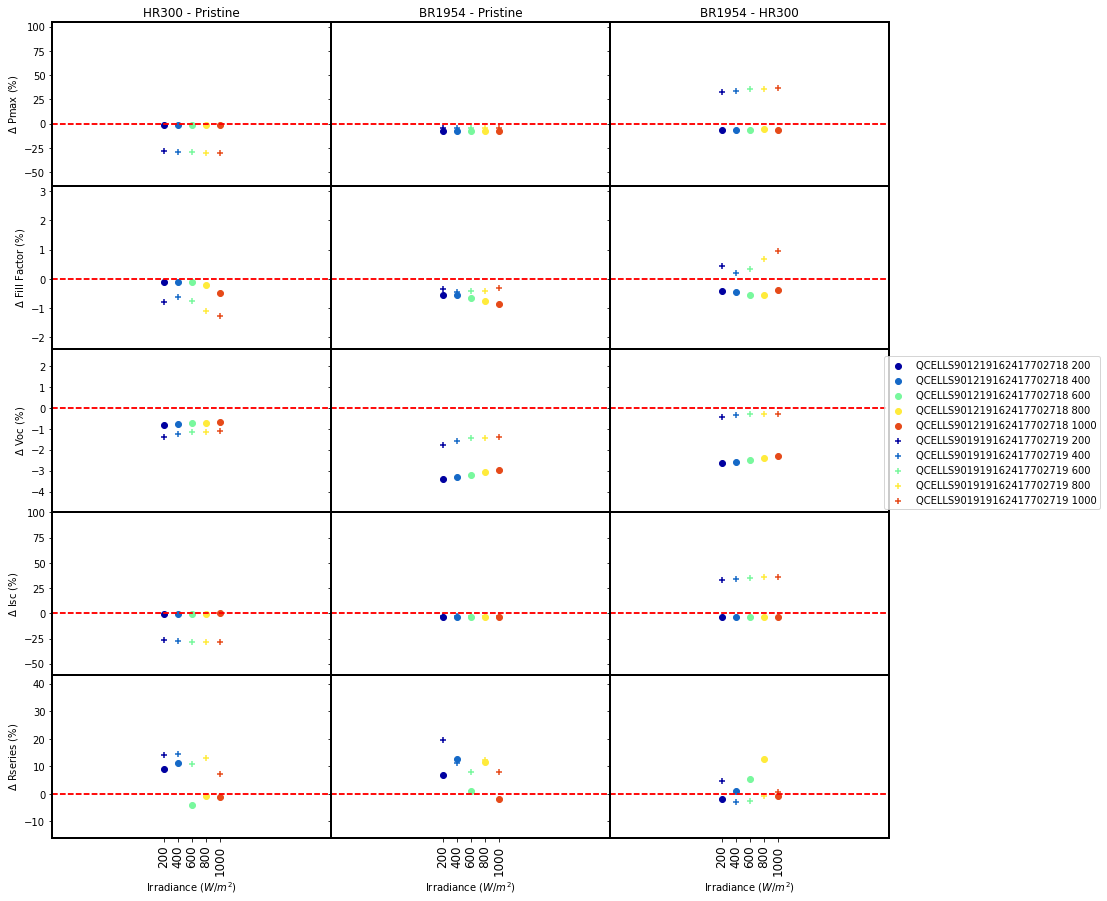

In [5]:
''' Creation: 2021.10.03
    Last update: 2021.10.09
    
    Interactive choice of the treatment differences
    
    ''' 
# Local imports
import PVcharacterization_Utils as pv

df_meta = pv.build_metadata_dataframe(df_files_descp,data_folder)
list_diff = pv.init_plot_diff(df_meta)
dic_trt_meaning = pv.input_treatment_labels(list_diff)
#list_params = ['Pmax','Voc','Isc','Fill Factor','Rseries','bidon','trarmiz']
#list_diff = []
pv.plot_params_diff(df_meta,list_diff,None,dic_trt_meaning)


In [10]:
''' Creation: 2021.09.19
    Last update: 2021.10.22
    
    Plotting of I/V curves.
    
    ''' 
# Local imports
import PVcharacterization_Utils as pv

list_mod_selected = pv.build_modules_list(df_files_descp,data_folder)
irr_select = [200,400,600,800,1000,2000,4000]
trt_select = ["T0", "T1", "T2", "T3", "T4"]
pv.plot_iv_curves(irr_select,list_mod_selected,trt_select,data_folder)

In [6]:
''' Creation: 2021.10.20
    Last update: 2021.10.21
Build a dashboard

'''
# Local imports
import PVcharacterization_Utils as pv

list_params = ['Pmax','Voc','Isc','Fill Factor','Rseries',]
df_meta_dashboard =  pv.data_dashboard(df_files_descp,data_folder,list_params)
df_meta_dashboard

Pmax                              \
irradiance                             200       400      600      800    
module_type              treatment                                        
JINERGY-6060             T3         66.2874  135.0440  203.347  271.066   
JINERGY-6063             T3         66.7409  136.0480  205.010  273.334   
JINERGY3272023326035     T0         72.2867  148.0820  223.513  298.946   
                         T1         72.5313  148.7740  224.548  300.210   
                         T2         71.1050  145.5900  219.481  293.451   
JINERGY3272023326060     T0         72.2480  148.0560  223.352  298.720   
                         T1         72.4547  148.7200  224.297  299.968   
                         T2         70.9538  145.3360  219.113  292.670   
JINERGY3272023326063     T0         72.1750  148.1750  223.648  299.285   
                         T1         72.6063  148.9580  224.789  300.624   
                         T2         71.1157  145.6370  219.705  293.671   
LC-BOREALIS-03           T0         69.5226  142.7220  215.791  288.808   
                         T1         69.4348  142.8310  215.712  288.728   
                         T2         67.7752  139.4110  210.823  281.658   
                         T3         67.2608  137.8750  209.510  280.381   
QCELL-2719               T3         59.0308  120.2630  181.915  242.803   
QCELL-2739               T3         59.0520  120.3110  182.077  243.074   
QCELLS901219162417702718 T0         65.0317  132.3170  200.057  267.033   
                         T1         64.1876  130.8180  197.733  263.854   
                         T2         60.1832  122.7050  185.489  247.754   
QCELLS901719162417702739 T0         64.6488  131.5750  199.009  265.737   
                         T1         64.3834  131.0970  198.122  264.582   
                         T2         62.8252  127.8410  193.344  258.260   
QCELLS901919162417702719 T0         65.4119  133.0220  201.102  268.581   
                         T1         46.9079   94.4662  141.855  188.220   
                         T2         62.2025  126.6560  191.725  256.148   

                                                 Voc                    \
irradiance                             1000     200      400      600    
module_type              treatment                                       
JINERGY-6060             T3         337.390  47.5284  49.1561  50.0568   
JINERGY-6063             T3         340.362  47.6412  49.2059  50.1261   
JINERGY3272023326035     T0         373.960  50.5082  51.8321  52.4938   
                         T1         375.024  50.6780  51.9387  52.6060   
                         T2         366.930  50.3452  51.6677  52.3567   
JINERGY3272023326060     T0         373.638  50.5029  51.8058  52.4813   
                         T1         375.357  50.6499  51.9466  52.5942   
                         T2         365.762  50.3900  51.6739  52.3795   
JINERGY3272023326063     T0         374.507  50.5481  51.8423  52.5325   
                         T1         376.158  50.7439  52.0163  52.6450   
                         T2         367.078  50.4401  51.7309  52.4144   
LC-BOREALIS-03           T0         361.951  49.6712  51.2920  52.1181   
                         T1         361.926  49.6714  51.3087  52.1065   
                         T2         355.474  49.4767  51.1764  52.0197   
                         T3         352.155  49.3996  51.1342  52.0054   
QCELL-2719               T3         302.992  36.2475  37.3399  38.0067   
QCELL-2739               T3         303.377  36.2612  37.3487  38.0055   
QCELLS901219162417702718 T0         333.409  37.8582  38.9622  39.6169   
                         T1         329.502  37.5533  38.6710  39.3261   
                         T2         309.267  36.5690  37.6737  38.3447   
QCELLS901719162417702739 T0         331.771  37.7107  38.8225  39.4630   
                         T1         330.253  37.5880  38.6942  39.3467   
             

In [ ]:
import matplotlib.pyplot as plt
df_meta = pv.build_metadata_dataframe(df_files_descp,data_folder)
g = df_meta.pivot(values= ['Pmax','irradiance'],index=['module_type','treatment',],
              columns=['irradiance',]) 
x = g.loc['QCELLS901919162417702719','T0'] ['irradiance'].to_numpy()
y = g.loc['QCELLS901919162417702719','T0'] ['Pmax'].to_numpy()
plt.scatter(x,y)

In [8]:
'''Correction of files names
'''

import os

list_mod_selected = pv.build_modules_list(df_files_descp,data_folder)

# Choose the longest module type name
list_mod_selected =sorted(list_mod_selected, key=len, reverse=True)
new_moduletype_name = list_mod_selected[0]

list_files_path = pv.build_modules_filenames(list_mod_selected[1:],data_folder)
for filename in list_files_path:
    corrected_filename = pv.correct_filename(filename,new_moduletype_name)
    print(filename)
    print(corrected_filename)
    print()
    #os.rename(filemame,corrected_filename)

C:\Users\franc\PVcharacterization_files\flash test\JINERGY\JInergy060\JINERGY-6060_0200W_T3.csv
C:\Users\franc\PVcharacterization_files\flash test\JINERGY\JInergy060\QCELLS901919162417702719_0200W_T3.csv

C:\Users\franc\PVcharacterization_files\flash test\JINERGY\JInergy060\JINERGY-6060_0400W_T3.csv
C:\Users\franc\PVcharacterization_files\flash test\JINERGY\JInergy060\QCELLS901919162417702719_0400W_T3.csv

C:\Users\franc\PVcharacterization_files\flash test\JINERGY\JInergy060\JINERGY-6060_0600W_T3.csv
C:\Users\franc\PVcharacterization_files\flash test\JINERGY\JInergy060\QCELLS901919162417702719_0600W_T3.csv

C:\Users\franc\PVcharacterization_files\flash test\JINERGY\JInergy060\JINERGY-6060_0800W_T3.csv
C:\Users\franc\PVcharacterization_files\flash test\JINERGY\JInergy060\QCELLS901919162417702719_0800W_T3.csv

C:\Users\franc\PVcharacterization_files\flash test\JINERGY\JInergy060\JINERGY-6060_1000W_T3.csv
C:\Users\franc\PVcharacterization_files\flash test\JINERGY\JInergy060\QCELLS90191916